In [31]:
# Import the modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [23]:
# Import data for homeless sheletered population and homeless total population in two csv files
sheltered_data_to_load = Path("2021-AHAR-Part-1_HomelessSheltered.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered = pd.read_csv(sheltered_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_sheltered, homeless_population, how="outer", on=["State", "State"])
homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,1626.0,1165.0,461.0,55.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0
1,Alaska,1797.0,1295.0,502.0,195.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0
2,Arizona,5460.0,3304.0,2165.0,249.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0
3,Arkansas,1470.0,1204.0,266.0,129.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0
4,California,51429.0,32910.0,18519.0,2526.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0


In [24]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,1626.0,1165.0,461.0,55.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0
1,Alaska,1797.0,1295.0,502.0,195.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0
2,Arizona,5460.0,3304.0,2165.0,249.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0
3,Arkansas,1470.0,1204.0,266.0,129.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0
4,California,51429.0,32910.0,18519.0,2526.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0


In [25]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']

# Create ChronicPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged['ShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Sheltered Homeless Population'] / homeless_merged['TotalPopulation']

# Create IndvShelteredPer10k column to calculate sheltered individuals per 10,000 residents

homeless_merged['IndvShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Individuals Sheltered'] / homeless_merged['TotalPopulation']

# Create FamsShelteredPer10k column to calculate sheltered families per 10,000 residents

homeless_merged['FamsShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Families Sheltered'] / homeless_merged['TotalPopulation']

# Create YouthShelteredPer10k column to calculate unaccompanied youth sheltered per 10,000 residents

homeless_merged['YouthShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['Unaccompanied Youth Sheltered'] / homeless_merged['TotalPopulation']

homeless_merged.head()

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,ChronicPer10k,ShelteredPer10k,IndvShelteredPer10k,FamsShelteredPer10k,YouthShelteredPer10k
0,Alabama,1626.0,1165.0,461.0,55.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0,1.063060,3.206930,2.297708,0.909222,0.108475
1,Alaska,1797.0,1295.0,502.0,195.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0,7.870345,24.553836,17.694612,6.859224,2.664440
2,Arizona,5460.0,3304.0,2165.0,249.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0,3.398037,7.493249,4.534376,2.971224,0.341725
3,Arkansas,1470.0,1204.0,266.0,129.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0,1.238552,4.842212,3.966002,0.876210,0.424929
4,California,51429.0,32910.0,18519.0,2526.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0,14.716052,13.103045,8.384787,4.718258,0.643573


In [26]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','Sheltered Homeless Population', 'TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k','IndvShelteredPer10k','FamsShelteredPer10k','YouthShelteredPer10k']]
homeless_reduced.head(10)

,State,Sheltered Homeless Population,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k,IndvShelteredPer10k,FamsShelteredPer10k,YouthShelteredPer10k
0,Alabama,1626.0,3752.0,7.4,539.0,1.063060,3.206930,2.297708,0.909222,0.108475
1,Alaska,1797.0,2320.0,31.7,576.0,7.870345,24.553836,17.694612,6.859224,2.664440
2,Arizona,5460.0,13553.0,18.6,2476.0,3.398037,7.493249,4.534376,2.971224,0.341725
3,Arkansas,1470.0,2459.0,8.1,376.0,1.238552,4.842212,3.966002,0.876210,0.424929
4,California,51429.0,171521.0,43.7,57760.0,14.716052,13.103045,8.384787,4.718258,0.643573
5,Colorado,8016.0,10397.0,17.9,3466.0,5.967241,13.800750,9.587872,4.212879,0.504444
6,Connecticut,2165.0,2930.0,8.1,117.0,0.323447,5.985154,4.157816,1.827338,0.265392
7,Delaware,1579.0,2369.0,23.6,196.0,1.952554,15.730013,7.332039,8.397974,0.408442
8,District of Columbia,4430.0,4410.0,65.8,1257.0,18.755238,66.098413,47.671429,18.426984,4.640317
9,Florida,13393.0,25959.0,11.9,4233.0,1.940472,6.139555,3.856189,2.283366,0.314473


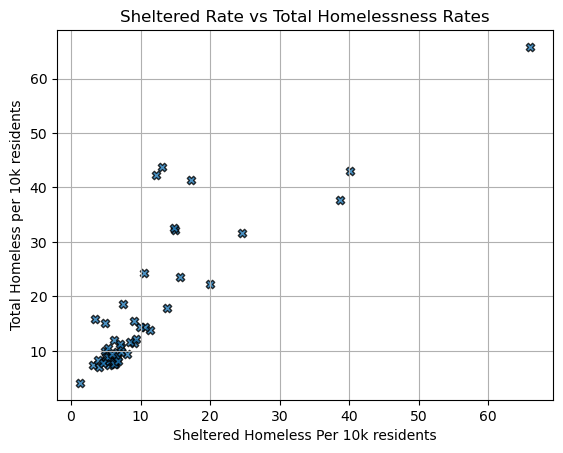

In [27]:
# Create scatter plot showing relationship scores between sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["ShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="X", 
    alpha=0.8,

)

# Augment
plt.title("Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

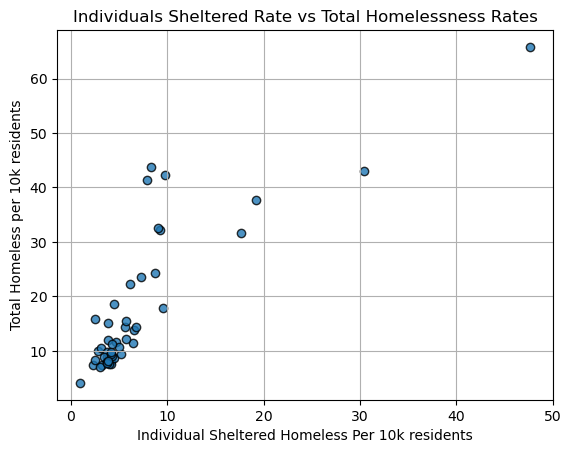

In [28]:
# Create scatter plot showing relationship scores between individual sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["IndvShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,

)

# Augment
plt.title("Individuals Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Individual Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

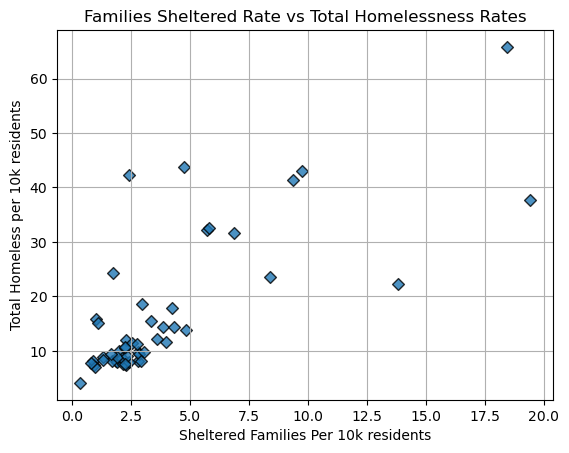

In [30]:
# Create scatter plot showing relationship scores between rate of families sheltered 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["FamsShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Families Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Sheltered Families Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()